# Part 2
## Question 1

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence

In [48]:
def sim_BS(T, r, S0, sigma_stock, M, seed=None):
    # Function to simulate a stock price using the Black-Scholes model

    rs = RandomState(MT19937(SeedSequence(seed)))

    dt = T / M
    S = np.zeros(M + 1)
    S[0] = S0
    for i in range(1, M + 1):
        Z = rs.standard_normal()
        S[i] = S[i - 1] * np.exp((r - 0.5 * sigma_stock ** 2) * dt + sigma_stock * np.sqrt(dt) * Z)
    return S

1.0 1
Option value:  0.0


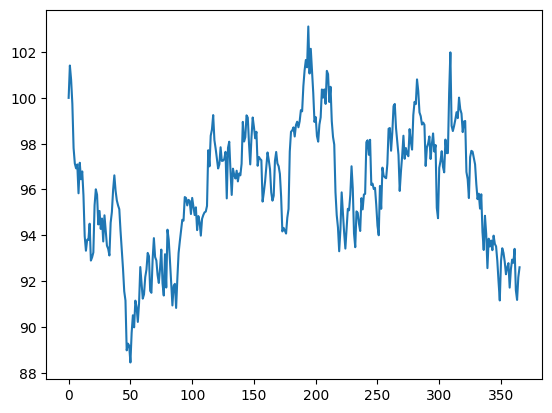

In [46]:
# Setting the parameter values
T = 1               # The time to maturity = 1 year
K = 99              # Strike price = 99 euros
r = 0.06            # Risk-free interest rate = 6%
S0 = 100            # The current stock price = 100 euros
sigma_stock = 0.2   # Volatility in the stock price = 20%
sigma_delta = 0.2   # The volatility used in the delta computation = 20%
M = 365             # Number of time steps (calculate the new stock price every day of the year)

S = sim_BS(T, r, S0, sigma_stock, M, None)
plt.plot(S)
print("Option value: ", np.maximum(S[-1] - K, 0))

Simulating deltas with the same seed: 100%|██████████| 1000/1000 [00:01<00:00, 605.23it/s]


Mean delta and standard deviation with different seeds: 86.97116560157075, 2365.610290566454
Mean delta and standard deviation with the same seed: 0.7033847112314491, 0.6044085948706773


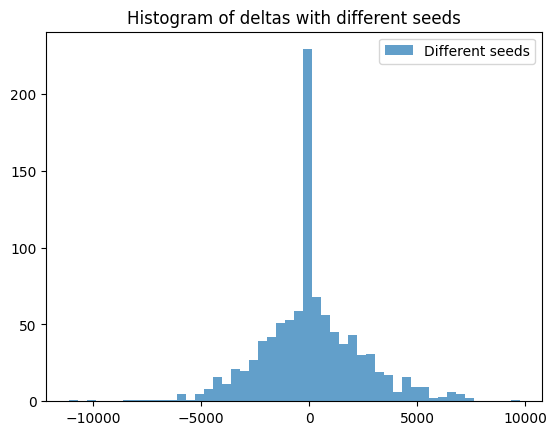

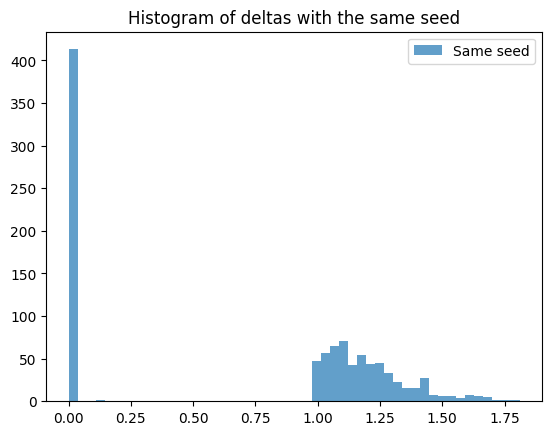

In [78]:
# Monte Carlo Simulation bump and revalue

# Setting the parameter values
T = 1               # The time to maturity = 1 year
K = 99              # Strike price = 99 euros
r = 0.06            # Risk-free interest rate = 6%
S0 = 100            # The current stock price = 100 euros
sigma_stock = 0.2   # Volatility in the stock price = 20%
sigma_delta = 0.2   # The volatility used in the delta computation = 20%
M = 365             # Number of time steps (calculate the new stock price every day of the year)


N = 1000            # Number of repetitions
bump = 0.01         # The size of the bump

delta_diff = np.zeros(N) # Array for results with different seeds
delta_same = np.zeros(N) # Array for results with the same seed

# Different seeds (setting None gives different seeds every time):
for i in tqdm(range(N), desc='Simulating deltas with different seeds'):
    unbumped_S = sim_BS(T, r, S0, sigma_stock, M, seed=None)
    unbumped_payoff = np.maximum(unbumped_S[-1] - K, 0)

    bumped_S = sim_BS(T, r, S0 + bump, sigma_stock, M, seed=None)
    bumped_payoff = np.maximum(bumped_S[-1] - K, 0)

    delta_diff[i] = (bumped_payoff - unbumped_payoff) / bump

# Same seeds (setting a specific seed gives the same seed every time):
for i in tqdm(range(N), desc='Simulating deltas with the same seed'):
    seed = np.random.randint(0, 1000000)

    unbumped_S = sim_BS(T, r, S0, sigma_stock, M, seed=seed)
    unbumped_payoff = np.maximum(unbumped_S[-1] - K, 0)

    bumped_S = sim_BS(T, r, S0 + bump, sigma_stock, M, seed=seed)
    bumped_payoff = np.maximum(bumped_S[-1] - K, 0)

    # print(f"Bumped payoff: {bumped_payoff}, Unbumped payoff: {unbumped_payoff}, Delta: {(bumped_payoff - unbumped_payoff) / bump}")
    delta_same[i] = (bumped_payoff - unbumped_payoff) / bump

    # if 0 < delta_same[i] < 1:
    #     print(f"Seed {i} gives a delta of {delta_same[i]}")

print(f"Mean delta and standard deviation with different seeds: {np.mean(delta_diff)}, {np.std(delta_diff)}")
print(f"Mean delta and standard deviation with the same seed: {np.mean(delta_same)}, {np.std(delta_same)}")

# Plotting the results in different histograms
plt.figure()
plt.hist(delta_diff, bins=50, alpha=0.7, label='Different seeds')
plt.legend()
plt.title('Histogram of deltas with different seeds')
plt.show()

plt.figure()
plt.hist(delta_same, bins=50, alpha=0.7, label='Same seed')
plt.legend()
plt.title('Histogram of deltas with the same seed')
plt.show()


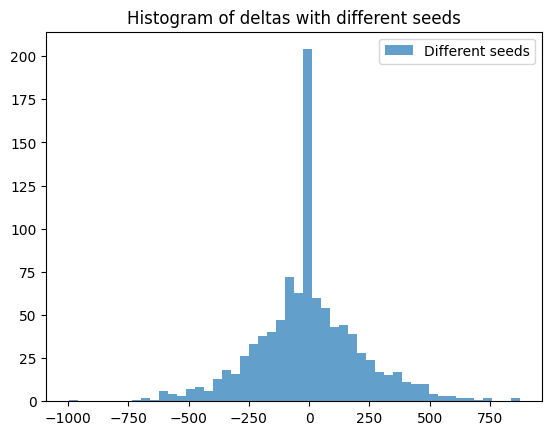

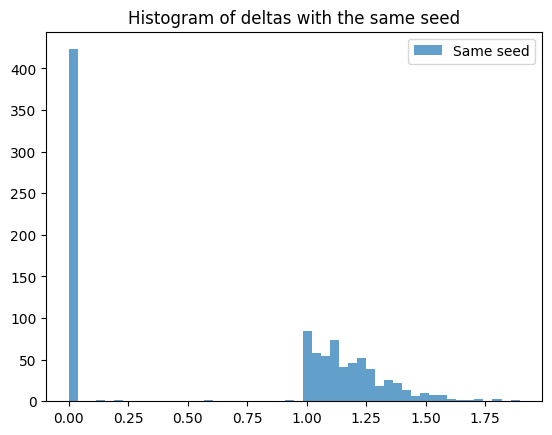

In [63]:
# Plotting the results in different histograms
plt.figure()
plt.hist(delta_diff, bins=50, alpha=0.7, label='Different seeds')
plt.legend()
plt.title('Histogram of deltas with different seeds')
plt.show()

plt.figure()
plt.hist(delta_same, bins=50, alpha=0.7, label='Same seed')
plt.legend()
plt.title('Histogram of deltas with the same seed')
plt.show()

In [57]:
print(delta_same)

[0. 0. 0. ... 0. 0. 0.]
